In [1]:
import os,sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
os.chdir('/data/arpit.goel/32_RecruitRestarauntPrediction/')

df_air_reserve=pd.read_csv('01.RawData/air_reserve.csv',parse_dates=['visit_datetime','reserve_datetime'])
df_air_store_info=pd.read_csv('01.RawData/air_store_info.csv')
df_air_visit_data=pd.read_csv('01.RawData/air_visit_data.csv',parse_dates=['visit_date'])
df_date_info=pd.read_csv('01.RawData/date_info.csv',parse_dates=['calendar_date'])
df_hpg_reserve=pd.read_csv('01.RawData/hpg_reserve.csv',parse_dates=['visit_datetime','reserve_datetime'])
df_hpg_store_info=pd.read_csv('01.RawData/hpg_store_info.csv')
df_store_id_relation=pd.read_csv('01.RawData/store_id_relation.csv')
df_sample_submission=pd.read_csv('01.RawData/sample_submission.csv')

In [55]:
restaraunt_master=pd.merge(df_air_store_info,df_store_id_relation,on=['air_store_id'],how='outer')
restaraunt_master=pd.merge(df_hpg_store_info,restaraunt_master,on=['hpg_store_id'],how='outer')
restaraunt_master.shape

(5456, 10)

In [68]:
restaraunt_master['latitude']=restaraunt_master[['latitude_x','latitude_y']].mean(axis=1)
restaraunt_master['longitude']=restaraunt_master[['longitude_x','longitude_y']].mean(axis=1)
restaraunt_master.head()

,hpg_store_id,hpg_genre_name,hpg_area_name,latitude_x,longitude_x,air_store_id,air_genre_name,air_area_name,latitude_y,longitude_y,latitude,longitude
0,hpg_6622b62385aec8bf,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221,NaN,NaN,NaN,NaN,NaN,35.643675,139.668221
1,hpg_e9e068dd49c5fa00,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221,NaN,NaN,NaN,NaN,NaN,35.643675,139.668221
2,hpg_2976f7acb4b3a3bc,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221,NaN,NaN,NaN,NaN,NaN,35.643675,139.668221
3,hpg_e51a522e098f024c,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221,NaN,NaN,NaN,NaN,NaN,35.643675,139.668221
4,hpg_e3d0e1519894f275,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221,NaN,NaN,NaN,NaN,NaN,35.643675,139.668221


In [87]:
suffix=['to','do','fu','ken','gun','shi','cho','mura','son','ku','chome','ban']
place=['prefecture','prefecture','prefecture','prefecture','county','city','town','village','village','ward','block','mean']
address_dict=dict(zip(suffix,place))


a=pd.crosstab(restaraunt_master['hpg_area_name'],restaraunt_master['air_area_name']).stack()
area_name=pd.concat([restaraunt_master['hpg_area_name'],restaraunt_master['air_area_name']]).value_counts().reset_index()
area_name.columns=['area_name','count']
area_name['area_list']=area_name['area_name'].map(lambda x: [x for x in x.split(' ') if x !='None' and len(x)>2])
area_name['state']=area_name['area_list'].map(lambda x: x[0] if len(x)>0 else '')
area_name['city']=area_name['area_list'].map(lambda x: x[0]+' '+x[1] if len(x)>1 else '')
area_name['area']=area_name['area_list'].map(lambda x: x[0]+' '+x[1]+' '+x[2] if len(x)>2 else '')
area_name

,area_name,count,area_list,state,city,area
0,Tōkyō-to Shinjuku-ku None,257,"[Tōkyō-to, Shinjuku-ku]",Tōkyō-to,Tōkyō-to Shinjuku-ku,
1,Tōkyō-to Chūō-ku Ginza,212,"[Tōkyō-to, Chūō-ku, Ginza]",Tōkyō-to,Tōkyō-to Chūō-ku,Tōkyō-to Chūō-ku Ginza
2,Hyōgo-ken Kōbe-shi None,163,"[Hyōgo-ken, Kōbe-shi]",Hyōgo-ken,Hyōgo-ken Kōbe-shi,
3,Ōsaka-fu Ōsaka-shi Shinsaibashisuji,150,"[Ōsaka-fu, Ōsaka-shi, Shinsaibashisuji]",Ōsaka-fu,Ōsaka-fu Ōsaka-shi,Ōsaka-fu Ōsaka-shi Shinsaibashisuji
4,Osaka Prefecture Osaka None,145,"[Osaka, Prefecture, Osaka]",Osaka,Osaka Prefecture,Osaka Prefecture Osaka
5,Hiroshima-ken Hiroshima-shi Hondōri,135,"[Hiroshima-ken, Hiroshima-shi, Hondōri]",Hiroshima-ken,Hiroshima-ken Hiroshima-shi,Hiroshima-ken Hiroshima-shi Hondōri
6,Tōkyō-to Shibuya-ku None,127,"[Tōkyō-to, Shibuya-ku]",Tōkyō-to,Tōkyō-to Shibuya-ku,
7,Tōkyō-to Minato-ku Takanawa,122,"[Tōkyō-to, Minato-ku, Takanawa]",Tōkyō-to,Tōkyō-to Minato-ku,Tōkyō-to Minato-ku Takanawa
8,Tōkyō-to Toshima-ku None,119,"[Tōkyō-to, Toshima-ku]",Tōkyō-to,Tōkyō-to Toshima-ku,
9,None None None,117,[],,,


In [92]:
area_name=pd.concat([restaraunt_master['hpg_area_name'],restaraunt_master['air_area_name']]).value_counts().reset_index()
area_name.columns=['area_name','count']
area_name['area_dict']=area_name['area_name'].map(lambda x: dict([(address_dict.get(x.split('-')[-1],x.split('-')[-1]),x.split('-')[0]) for x in x.split(' ') if x.count('-')>0]))
area_name

,area_name,count,area_dict
0,Tōkyō-to Shinjuku-ku None,257,"{u'ward': u'Shinjuku', u'prefecture': u'Tōkyō'}"
1,Tōkyō-to Chūō-ku Ginza,212,"{u'ward': u'Chūō', u'prefecture': u'Tōkyō'}"
2,Hyōgo-ken Kōbe-shi None,163,"{u'city': u'Kōbe', u'prefecture': u'Hyōgo'}"
3,Ōsaka-fu Ōsaka-shi Shinsaibashisuji,150,"{u'city': u'Ōsaka', u'prefecture': u'Ōsaka'}"
4,Osaka Prefecture Osaka None,145,{}
5,Hiroshima-ken Hiroshima-shi Hondōri,135,"{u'city': u'Hiroshima', u'prefecture': u'Hiros..."
6,Tōkyō-to Shibuya-ku None,127,"{u'ward': u'Shibuya', u'prefecture': u'Tōkyō'}"
7,Tōkyō-to Minato-ku Takanawa,122,"{u'ward': u'Minato', u'prefecture': u'Tōkyō'}"
8,Tōkyō-to Toshima-ku None,119,"{u'ward': u'Toshima', u'prefecture': u'Tōkyō'}"
9,None None None,117,{}


In [103]:
df_air_visit_data.groupby(['air_store_id']).apply(lambda x: x.describe(percentiles=[0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])).unstack()

visitors                                                 \
                        count       mean        std  min     1%     5%   10%   
air_store_id                                                                   
air_00a91d42b08b08d9    232.0  26.081897  12.435364  1.0   2.31   7.00  11.0   
air_0164b9927d20bcc3    149.0   9.248322   6.348980  1.0   1.00   1.00   2.0   
air_0241aa3964b7f861    396.0   9.896465   6.214877  1.0   1.00   2.75   3.0   
air_0328696196e46f18    116.0   7.939655   6.733807  1.0   1.00   1.75   2.0   
air_034a3d5b40d5b1b1    251.0  14.828685  13.154107  1.0   1.00   1.00   2.0   
air_036d4f1ee7285390    281.0  22.455516  14.590566  4.0   4.00   7.00   9.0   
air_0382c794b73b51ad    298.0  23.687919  11.642251  1.0   1.00   1.00   9.0   
air_03963426c9312048    429.0  39.340326  23.738958  2.0   3.00   6.00   9.0   
air_04341b588bde96cd    472.0  35.870763  16.220424  1.0   3.71  13.00  16.0   
air_049f6d5b402a31b2    258.0  11.531008   6.431395  1.0   2.00   2.00   4.0   
air_04cae7c1bc9b2a0b    291.0  22.113402  12.715895  2.0   2.00   6.00   8.0   
air_0585011fa179bcce    273.0   4.776557   2.752920  1.0   1.00   2.00   2.0   
air_05c325d315cc17f5    468.0  22.495726   9.193261  1.0   4.67   8.00  11.7   
air_0647f17b4dc041c8    287.0  36.428571  18.374721  1.0   1.00   2.00   5.6   
air_064e203265ee5753    222.0  21.689189  10.460344  1.0   4.21  10.00  12.0   
air_066f0221b8a4d533    277.0  14.310469  10.448857  1.0   1.00   2.00   3.0   
air_06f95ac5c33aca10    401.0  22.206983  12.237016  1.0   2.00   5.00   7.0   
air_0728814bd98f7367    431.0   9.951276   6.801843  1.0   1.00   1.50   2.0   
air_0768ab3910f7967f    329.0  19.899696  19.020984  1.0   1.00   1.00   2.0   
air_07b314d83059c4d2    294.0  33.224490  16.184641  6.0  10.93  14.65  17.0   
air_07bb665f9cdfbdfb    380.0  29.434211  22.257746  1.0   1.00  11.00  14.0   
air_082908692355165e    428.0  40.672897  23.767423  1.0   2.00   4.00   9.0   
air_083ddc520ea47e1e    205.0  10.243902   7.807677  1.0   1.00   1.00   3.0   
air_0845d8395f30c6bb    281.0  21.960854  13.067485  1.0   1.00   4.00   7.0   
air_084d98859256acf0    240.0  14.695833   6.893328  1.0   1.39   4.00   6.9   
air_0867f7bebad6a649    220.0  23.113636  17.081080  1.0   2.00   3.95   6.0   
air_08ba8cd01b3ba010    459.0  10.366013   5.180268  1.0   1.00   2.00   4.0   
air_08cb3c4ee6cd6a22    289.0  15.145329   8.856082  1.0   2.00   3.00   4.8   
air_08ef81d5b7a0d13f    240.0  14.070833   8.175838  1.0   1.00   2.95   4.0   
air_08f994758a1e76d4    289.0  26.190311  15.331129  2.0   3.88   6.00   8.0   
...                       ...        ...        ...  ...    ...    ...   ...   
air_f6b2489ccf873c3b    470.0  16.025532   4.115003  6.0   7.00  10.00  11.0   
air_f6bfd27e2e174d16    251.0  15.621514  10.009005  1.0   1.00   3.00   4.0   
air_f6cdaf7b7fdc6d78    268.0  10.526119   6.679057  1.0   1.00   1.00   2.0   
air_f8233ad00755c35c    263.0  35.159696  15.817819  1.0   2.00   6.10  11.0   
air_f85e21e543cf44f2    222.0   5.036036   3.982832  1.0   1.00   1.00   1.0   
air_f88898cd09f40496    278.0   7.902878   5.388977  1.0   1.00   2.00   3.0   
air_f911308e19d64236    407.0  36.402948  16.428972  4.0   8.06  13.00  16.6   
air_f9168b23fdfc1e52    267.0  12.404494   9.531175  1.0   1.00   2.00   4.0   
air_f927b2da69a82341    295.0  15.437288  10.028292  1.0   3.00   4.00   5.0   
air_f957c6d6467d4d90    294.0  10.282313   5.198966  1.0   1.00   3.00   4.0   
air_f96765e800907c77    393.0  41.396947  23.463937  1.0   1.92   5.00   8.0   
air_fa12b40b02fecfd8    261.0  16.348659   8.234840  1.0   2.60   5.00   6.0   
air_fa4ffc9057812fa2    368.0   6.972826   6.266499  1.0   1.00   1.00   2.0   
air_fab092c35776a9b1    456.0  11.429825   5.599010  1.0   3.00   4.00   6.0   
air_fb44f566d4f64a4e    134.0  16.559701   9.456279  1.0   2.99   5.65   7.0   
air_fbadf737162a5ce3    407.0  21.090909   9.043087  2.0   4.06   7.00  10.0   
air_fc477473134e9ae5 

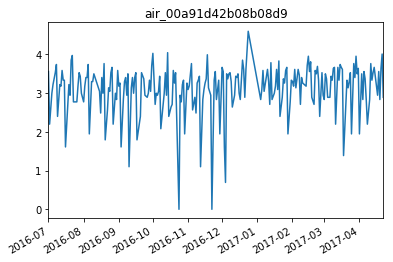

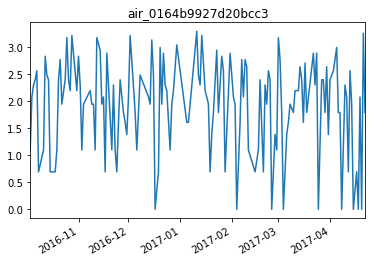

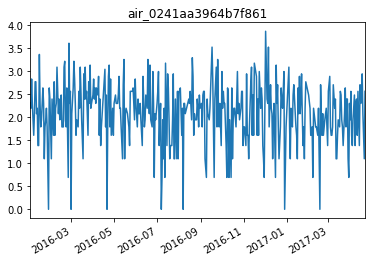

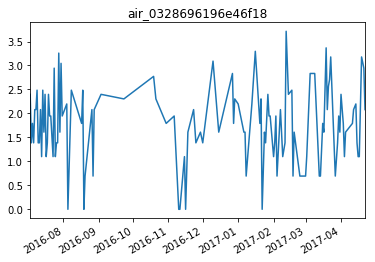

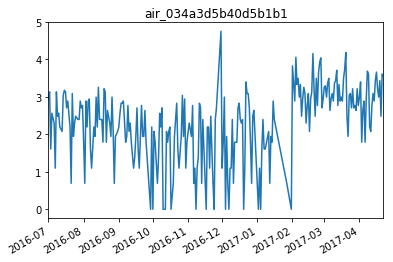

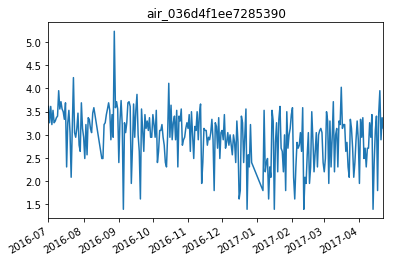

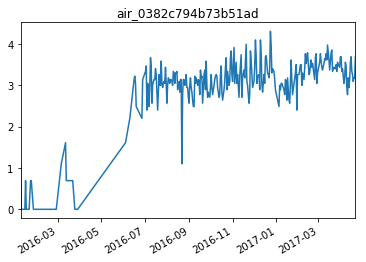

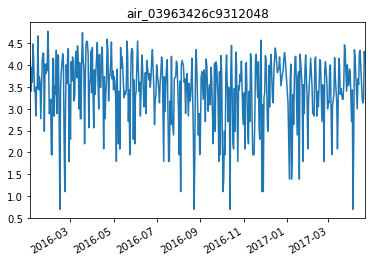

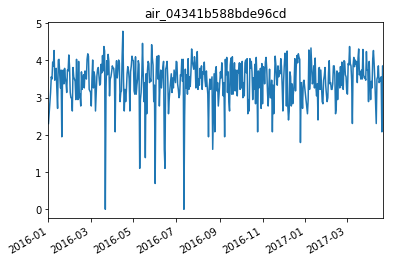

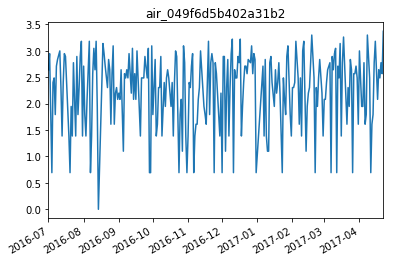

In [111]:
for i,(name,group) in enumerate(df_air_visit_data.groupby(['air_store_id'])):
    if i<10:
        pd.Series(np.log(group['visitors']).tolist(),index=group['visit_date'].tolist()).plot()
        plt.title(name)
        plt.show()
        
                  

In [113]:
df_air_reserve.head(50)

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5
5,air_db80363d35f10926,2016-01-02 01:00:00,2016-01-01 16:00:00,2
6,air_db80363d35f10926,2016-01-02 01:00:00,2016-01-01 15:00:00,4
7,air_3bb99a1fe0583897,2016-01-02 16:00:00,2016-01-02 14:00:00,2
8,air_3bb99a1fe0583897,2016-01-02 16:00:00,2016-01-01 20:00:00,2
9,air_2b8b29ddfd35018e,2016-01-02 17:00:00,2016-01-02 17:00:00,2


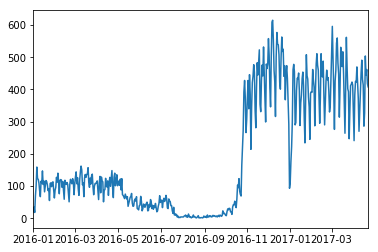

In [123]:
df_air_reserve['diff']=df_air_reserve.reserve_datetime-df_air_reserve.visit_datetime
#df_air_reserve.visit_datetime.dt.date
df_air_reserve.reserve_datetime.dt.date.value_counts().sort_index().plot()

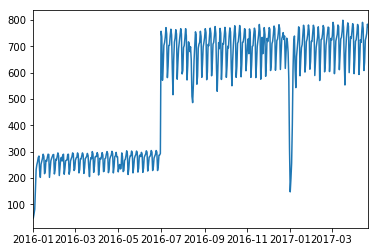

In [125]:
df_air_visit_data['visit_date'].dt.date.value_counts().sort_index().plot()

In [169]:
dates=df_air_visit_data.groupby('air_store_id')['visit_date'].apply(lambda x: {'first':x.min(),'last':x.max()}).unstack()
(100*dates['first'].dt.year+dates['first'].dt.month).value_counts().sort_index()
dates['last'].value_counts()

2017-04-22    774
2017-04-21     34
2017-04-20      6
2017-04-16      2
2017-04-17      2
2017-04-18      2
2017-04-19      2
2017-03-08      1
2017-03-31      1
2016-10-02      1
2016-11-06      1
2017-04-02      1
2017-03-17      1
2017-03-18      1
Name: last, dtype: int64

In [145]:
pd.to_datetime(df_sample_submission.id.str.split('-').str.get(2)).value_counts().sort_index()

2017-04-23    821
2017-04-24    821
2017-04-25    821
2017-04-26    821
2017-04-27    821
2017-04-28    821
2017-04-29    821
2017-04-30    821
2017-05-01    821
2017-05-02    821
2017-05-03    821
2017-05-04    821
2017-05-05    821
2017-05-06    821
2017-05-07    821
2017-05-08    821
2017-05-09    821
2017-05-10    821
2017-05-11    821
2017-05-12    821
2017-05-13    821
2017-05-14    821
2017-05-15    821
2017-05-16    821
2017-05-17    821
2017-05-18    821
2017-05-19    821
2017-05-20    821
2017-05-21    821
2017-05-22    821
2017-05-23    821
2017-05-24    821
2017-05-25    821
2017-05-26    821
2017-05-27    821
2017-05-28    821
2017-05-29    821
2017-05-30    821
2017-05-31    821
Name: id, dtype: int64

In [153]:
test=df_sample_submission['id'].map(lambda x: '_'.join(x.split('_')[:2])).value_counts().reset_index()
test.columns=['id','count']

In [175]:
(100*df_air_reserve.reserve_datetime.dt.year+df_air_reserve.reserve_datetime.dt.month).value_counts().sort_index()

201601     2936
201602     2999
201603     3643
201604     3155
201605     2027
201606     1198
201607      950
201608      139
201609      227
201610     3481
201611    12383
201612    14275
201701    11286
201702    11505
201703    13468
201704     8706
Name: reserve_datetime, dtype: int64

In [254]:
df_air_visit_data['weekday']=df_air_visit_data.visit_date.dt.weekday
df_air_visit_data['weekstart_date']=df_air_visit_data.visit_date-pd.to_timedelta(df_air_visit_data['weekday'], unit='D')

weekly_visits=np.log(df_air_visit_data.groupby(['air_store_id','weekstart_date','weekday'])['visitors'].sum()).unstack()
weekly_vists_1=weekly_visits.T.fillna(weekly_visits.mean(axis=1)).T
weekly_vists_1=(weekly_vists_1.T/weekly_vists_1.sum(axis=1)).T

In [256]:
store_week_distribution=weekly_vists_1.groupby(level=[0]).mean()
store_week_distribution=(store_week_distribution-store_week_distribution.mean())/store_week_distribution.std()
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(store_week_distribution)
pd.DataFrame(kmeans.cluster_centers_)
counts=pd.Series(kmeans.labels_).value_counts()
store_week_distribution['cluster']=kmeans.labels_
#for i,vector in enumerate(kmeans.cluster_centers_):
#    plt.plot(range(7),vector)
#    plt.title('Cluster: %d. Count: %d'%(i,counts[i]))
#    plt.show()
    
pd.DataFrame(kmeans.cluster_centers_)

,0,1,2,3,4,5,6
0,0.250224,0.673546,0.754455,0.765243,0.401227,-0.896865,-0.774903
1,0.382056,-0.057783,-0.421407,-0.314268,-0.842591,0.124155,0.673506
2,-0.850390,-0.716941,-0.286810,-0.454704,0.742644,0.886313,-0.053765


In [257]:
print counts

1    330
0    271
2    228
dtype: int64


In [258]:


df_air_store_info['cluster']=df_air_store_info['air_store_id'].map(store_week_distribution['cluster'])
pd.crosstab(df_air_store_info['air_genre_name'],df_air_store_info['cluster']) 


cluster,0,1,2
air_genre_name,,,
Asian,1,1,0
Bar/Cocktail,20,25,34
Cafe/Sweets,44,126,11
Creative cuisine,5,7,1
Dining bar,29,37,42
International cuisine,0,2,0
Italian/French,42,33,27
Izakaya,66,51,80
Japanese food,37,16,10


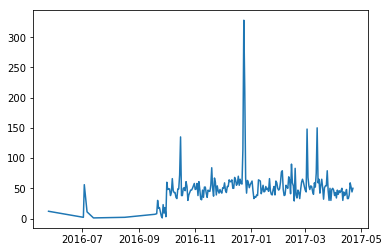

In [262]:
df_air_visit_data.groupby('air_store_id')['visitors'].mean().sort_values()
sample1=df_air_visit_data[df_air_visit_data['air_store_id']=='air_d98380a4aeb0290b']
plt.plot(sample1['visit_date'],sample1['visitors'])


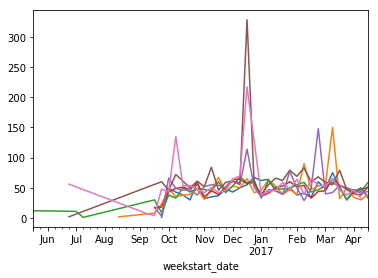

In [269]:
for day in range(7):
    sample1[sample1['weekday']==day].groupby(['weekstart_date'])['visitors'].sum().plot()
    #plt.show()

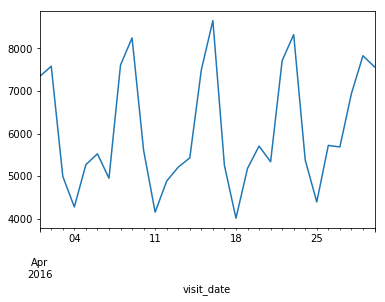

In [271]:
df_air_visit_data['month']=100*df_air_visit_data['visit_date'].dt.year+df_air_visit_data['visit_date'].dt.month
sample=df_air_visit_data[df_air_visit_data['month']==201611]

sample.groupby(['visit_date'])['visitors'].sum().plot()

In [273]:
df_date_info.head()

,calendar_date,day_of_week,holiday_flg
0,2016-01-01,Friday,1
1,2016-01-02,Saturday,1
2,2016-01-03,Sunday,1
3,2016-01-04,Monday,0
4,2016-01-05,Tuesday,0


In [ ]:
df_air_visit_data['weekday']=df_air_visit_data.visit_date.dt.weekday
df_air_visit_data['weekstart_date']=df_air_visit_data.visit_date-pd.to_timedelta(df_air_visit_data['weekday'], unit='D')

weekly_visits=np.log(df_air_visit_data.groupby(['air_store_id','weekstart_date','weekday'])['visitors'].sum()).unstack()
weekly_vists_1=weekly_visits.T.fillna(weekly_visits.mean(axis=1)).T
weekly_vists_1=(weekly_vists_1.T/weekly_vists_1.sum(axis=1)).T

In [283]:
reservation_diff=np.clip((df_air_reserve.visit_datetime-df_air_reserve.reserve_datetime).dt.days,0,20).value_counts().sort_index()
reservation_diff.cumsum()/reservation_diff.sum()

0     0.359956
1     0.478198
2     0.554201
3     0.613241
4     0.657743
5     0.693639
6     0.726039
7     0.756165
8     0.780511
9     0.801349
10    0.819048
11    0.834376
12    0.846554
13    0.859783
14    0.871723
15    0.882191
16    0.892236
17    0.901113
18    0.908106
19    0.914060
20    1.000000
dtype: float64

In [349]:
def haversine(a,b,c,d):
    a=np.radians(a).astype(np.float64)
    b=np.radians(b).astype(np.float64)
    c=np.radians(c).astype(np.float64)
    d=np.radians(d).astype(np.float64)
    dlon=d-c
    dlat=b-a
    e=np.clip(np.sin(dlat/2)**2 + np.cos(b)*np.cos(a)*np.sin(dlon/2)**2,-1,1)
    f=6371*2*np.arcsin(np.sqrt(e)) 
    return f



In [316]:
stores_1=df_air_store_info[['air_store_id','latitude','longitude']]
stores_2=df_hpg_store_info[['hpg_store_id','latitude','longitude']]
stores=pd.concat([stores_1,stores_2])
stores['flag_air']=stores['air_store_id'].notnull().astype(np.int64)
stores['store_id']=np.where(stores['flag_air'],stores['air_store_id'],stores['hpg_store_id'])
stores=stores[['store_id','latitude','longitude','flag_air']]

In [379]:
stores_1=stores[stores['flag_air']==1]
def get_store_distances(x):
    a=stores_1.copy()
    a['store_id_1']=x['store_id']
    a['store_id_2']=a['store_id']
    a['distance']=haversine(x['latitude'],a['latitude'],x['longitude'],a['longitude'])
    return a[['store_id_1','store_id_2','distance']]

air_store_distance=pd.concat([get_store_distances(x[1]) for x in stores_1.iterrows()])



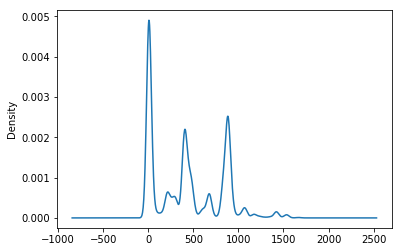

In [380]:
air_store_distance.distance.plot.kde()

In [3]:
import unidecode

stores=pd.concat([df_air_store_info,df_hpg_store_info])
stores['flag_air']=stores['air_store_id'].notnull().astype(np.int64)
stores['store_id']=np.where(stores['flag_air'],stores['air_store_id'],stores['hpg_store_id'])
stores['area_name']=np.where(stores['flag_air'],stores['air_area_name'],stores['hpg_area_name'])
stores['genre']=np.where(stores['flag_air'],stores['air_genre_name'],stores['hpg_genre_name'])
stores=stores[['store_id','flag_air','genre','area_name','latitude','longitude']]
stores.head()

suffix=['to','do','fu','ken','gun','shi','cho','mura','son','ku','chome','ban']
place=['prefecture','prefecture','prefecture','prefecture','county','city','town','village','village','ward','block','mean']
address_dict=dict(zip(suffix,place))

def get_region(x):
    y=[y.split('-') for y in unidecode.unidecode(x).lower().split(' ') if y.count('-')>0]
    z=dict([(address_dict.get(z[1],'OTHER'),z[0]) for z in y])
    return z
stores_1=pd.DataFrame.from_dict(stores['area_name'].map(get_region).tolist())
stores_1.index=stores.index
stores=pd.concat([stores,stores_1],axis=1)

region_dict=[]
for col in stores_1.columns:
    regions=stores[[col]].drop_duplicates().dropna()
    regions['value']=col
    regions['key']=regions[col]
    region_dict.append(pd.Series(regions['value'].tolist(),index=regions['key'].tolist()))
region_dict=pd.concat(region_dict)

def get_region_2(x):
    area_name=unidecode.unidecode(x['area_name']).lower()
    for key,value in region_dict.items():
        if key in area_name:
            x[value]=key
    return x
stores=stores.apply(get_region_2,axis=1)

cuisine_lookup={'Amusement bar':'bar',\
                'Bar/Cocktail':'bar',\
                'Dining bar':'bar',\
                'Bistro':'bistro',\
                'Cafe':'cafe',\
                'Cafe/Sweets':'cafe',\
                'Asian':'chinese',\
                'Cantonese food':'chinese',\
                'Chinese general':'chinese',\
                'Shanghai food':'chinese',\
                'Sichuan food':'chinese',\
                'Creation':'creative',\
                'Creative cuisine':'creative',\
                'Dim Sum/Dumplings':'dumplings',\
                'French':'french',\
                'International cuisine':'international',\
                'Steak/Hamburger/Curry':'international',\
                'Western food':'international',\
                'Italian':'italian',\
                'Italian/French':'italian',\
                'Pasta/Pizza':'italian',\
                'Japanese cuisine/Kaiseki':'japanese',\
                'Japanese food':'japanese',\
                'Japanese food in general':'japanese',\
                'Japanese style':'japanese',\
                'Shabu-shabu/Sukiyaki':'japanese',\
                'Izakaya':'bar',\
                'Creative Japanese food':'japanese',\
                'Okonomiyaki/Monja/Teppanyaki':'japanese',\
                'Sushi':'japanese',\
                'Udon/Soba':'japanese',\
                'Karaoke':'karaoke',\
                'Karaoke/Party':'karaoke',\
                'Korean cuisine':'korean',\
                'Yakiniku/Korean food':'korean',\
                'Grilled meat':'japanese',\
                'Other':'other',\
                'Party':'party',\
                'Seafood':'japanese',\
                'Spain/Mediterranean cuisine':'international',\
                'Spain Bar/Italian Bar':'international',\
                'Sweets':'sweets',\
                'Taiwanese/Hong Kong cuisine':'chinese',\
                'Thai/Vietnamese food':'chinese'}

stores['cuisine_clean']=stores['genre'].map(cuisine_lookup)


In [4]:
stores.to_csv('02.CleanData/01.StoreRegion.csv')

In [80]:
!mkdir 02.CleanData

In [395]:
#df_date_info.groupby(df_date_info['calendar_date'].dt.month)['holiday_flg'].sum().plot.hist()
df_date_info['year']=df_date_info['calendar_date'].dt.year
df_date_info['month']=df_date_info['calendar_date'].dt.month
df_date_info

,calendar_date,day_of_week,holiday_flg,year,month
0,2016-01-01,Friday,1,2016,1
1,2016-01-02,Saturday,1,2016,1
2,2016-01-03,Sunday,1,2016,1
3,2016-01-04,Monday,0,2016,1
4,2016-01-05,Tuesday,0,2016,1
